In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [25]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("../data/AdSmartABdata.csv")
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


### dataset description

In [26]:
df.shape

(8077, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


### Our data has 8077 rows and 9 columns

### univariate analysis of the data

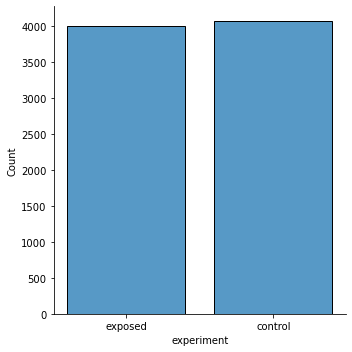

In [28]:
sns.displot(df, x=df['experiment'], shrink=.8)

#### The exposed and control group are equally distributed

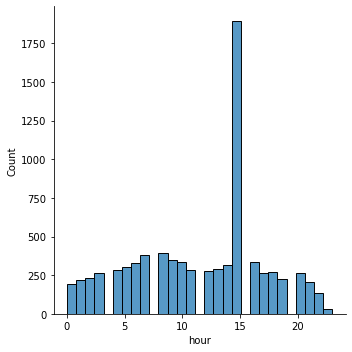

In [29]:
sns.displot(df.hour)

#### Hour 15 has the most reponses on the ad

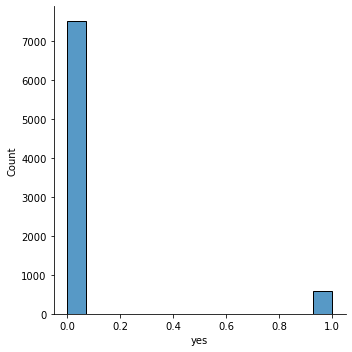

In [30]:
sns.displot(df.yes)

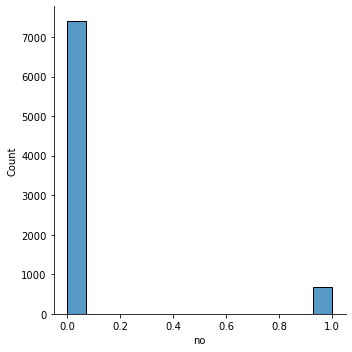

In [31]:
sns.displot(df.no)

In [32]:
df['engagement'] = df['yes'] + df['no']
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,engagement
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0


In [33]:
pd.crosstab(df['experiment'], df['engagement'])

engagement,0,1
experiment,,
control,3485,586
exposed,3349,657


#### Majority of the responses went unaswered with exposed only having a slightly higher number

In [34]:
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
from math import ceil

In [35]:
effect_size = sms.proportion_effectsize(0.12, 0.15)
required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )
required_n = ceil(required_n)
print(required_n)

2031


In [36]:
session_counts = df['auction_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} auction_id that appear multiple times in the dataset')

There are 0 auction_id that appear multiple times in the dataset


In [37]:
control_sample = df[df['experiment'] == 'control'].sample(n=required_n, random_state=22)
exposed_sample = df[df['experiment'] == 'exposed'].sample(n=required_n, random_state=22)

ab_test = pd.concat([control_sample, exposed_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,engagement
0,e1d49107-f02f-4e09-8750-b22ae05d841d,control,2020-07-06,6,Generic Smartphone,6,Chrome Mobile,0,0,0
1,8b39c872-00f5-4278-9f0f-f8a096f4d076,control,2020-07-09,6,Generic Smartphone,6,Chrome Mobile,0,0,0
2,6d39d727-e406-4aee-acd9-6ce280018c73,control,2020-07-04,6,Generic Smartphone,6,Chrome Mobile,0,0,0
3,e44b9ba2-9a29-4477-a6ee-4913293a1a8b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,0
4,9839dfb9-13ee-4361-85f6-7e132ce30396,control,2020-07-03,15,Samsung SM-G980F,6,Facebook,0,1,1
...,...,...,...,...,...,...,...,...,...,...
4057,7cebd2b7-7978-428a-b0a8-9d38766bd299,exposed,2020-07-07,22,Generic Smartphone,6,Chrome Mobile,1,0,1
4058,cb9fa20d-8c66-48ed-8fff-c3541fb28f83,exposed,2020-07-03,8,Generic Smartphone,6,Chrome Mobile,0,0,0
4059,f63133b5-7748-4423-bca9-6e5b409a53e6,exposed,2020-07-08,14,Generic Smartphone,6,Chrome Mobile WebView,0,1,1
4060,7cc80ba7-4b4c-4a7d-8797-ac578cb78a02,exposed,2020-07-06,7,Samsung SM-G960F,6,Samsung Internet,0,0,0


In [38]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   4062 non-null   object
 1   experiment   4062 non-null   object
 2   date         4062 non-null   object
 3   hour         4062 non-null   int64 
 4   device_make  4062 non-null   object
 5   platform_os  4062 non-null   int64 
 6   browser      4062 non-null   object
 7   yes          4062 non-null   int64 
 8   no           4062 non-null   int64 
 9   engagement   4062 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 317.5+ KB


In [39]:
ab_test['experiment'].value_counts()

control    2031
exposed    2031
Name: experiment, dtype: int64

In [40]:
conversion_rates = ab_test.groupby('experiment')['engagement']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.142,0.349,0.008
exposed,0.164,0.370,0.008


### Judging by the stats above, it does look like our two designs performed very similarly, with our new design performing slightly better, approx. 14.2% vs. 16.4% conversion rate

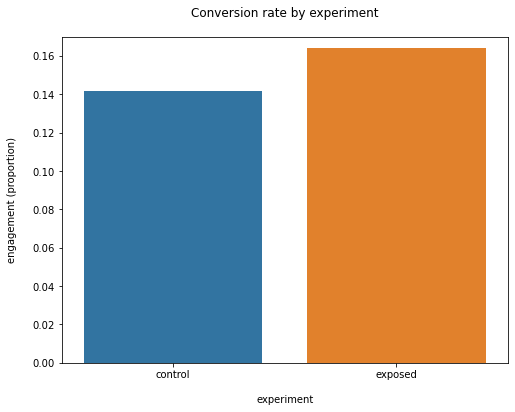

In [41]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['experiment'], y=ab_test['engagement'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by experiment', pad=20)
plt.xlabel('experiment', labelpad=15)
plt.ylabel('engagement (proportion)', labelpad=15);

In [42]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab_test[ab_test['experiment'] == 'control']['engagement']
treatment_results = ab_test[ab_test['experiment'] == 'exposed']['engagement']

n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -1.96
p-value: 0.050
ci 95% for control group: [0.127, 0.157]
ci 95% for treatment group: [0.148, 0.180]


#### Since our p-value=0.050 is near our α=0.05 threshold, we can reject the Null hypothesis Hₒ, which means that our new design performed significantly different (slightly better) than our old one

In [43]:
#dfv2 = df.drop(['platform_os'],axis=1)
#dfv2.to_csv('../data/AdSmartABdatav2.csv')

In [44]:
#dfv3 = df.drop(['browser'],axis=1)
#dfv3.to_csv('../data/AdSmartABdatav3.csv')

In [45]:
#df.to_csv('../data/AdSmartABdatav4.csv')